In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import seaborn as sns

In [2]:
#get racial demographic data

df_niche = pd.read_csv("datasets/niche4yearpublicprivate.csv")

#niche[niche.isnull().any(axis=1)]
df_columns = df_niche[['African American', 'Asian', 'Hispanic', 'International', 'Multiracial', 'Native American','Pacific Islander', 'Unknown', 'White']]
df_niche = df_niche.drop("International", axis=1)
for indexr, university in df_niche.iterrows():
    sum = 0
    for indexc, newvalue in university.iteritems():
        if "%" in str(newvalue):
            oldvalue = (newvalue)
            newvalue = (float(newvalue.rstrip("%"))) / 100
            df_niche.loc[indexr,indexc] = newvalue
            sum = sum + newvalue
    for indexc, newvalue in university.iteritems():
        if isinstance(df_niche.loc[indexr,indexc], float):
            df_niche.loc[indexr,indexc] = round((float(df_niche.loc[indexr,indexc]) / sum),2)

df_niche_800 = df_niche
df_niche = df_niche.head(500) #top 500 colleges
df_niche_800

,ranking,name,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
0,1,massachusetts-institute-of-technology,0.07,0.28,0.17,0.07,0,0,0.02,0.39
1,2,stanford-university,0.07,0.23,0.16,0.12,0.01,0,0.01,0.4
2,3,harvard-university,0.07,0.22,0.12,0.06,0,0,0.04,0.49
3,4,yale-university,0.07,0.19,0.14,0.06,0.01,0,0.04,0.49
4,5,princeton-university,0.08,0.23,0.1,0.05,0,0,0.07,0.47
5,6,university-of-pennsylvania,0.08,0.23,0.1,0.05,0,0,0.05,0.49
6,7,columbia-university,0.09,0.21,0.16,0.06,0,0,0.04,0.45
7,8,duke-university,0.11,0.23,0.09,0.02,0.01,0,0.03,0.51
8,9,brown-university,0.07,0.16,0.13,0.07,0,0,0.09,0.48
9,10,california-institute-of-technology,0.01,0.47,0.13,0.08,0,0,0,0.31


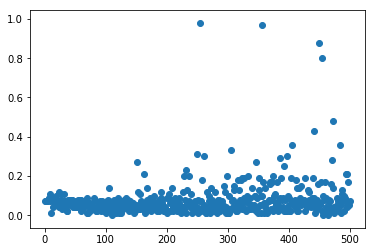

In [3]:
plt.scatter(df_niche.ranking, df_niche["African American"])

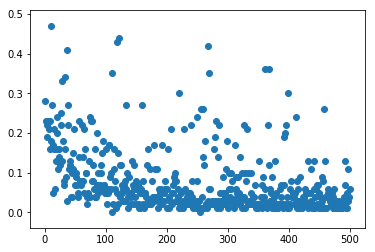

In [4]:
plt.scatter(df_niche.ranking, df_niche["Asian"])

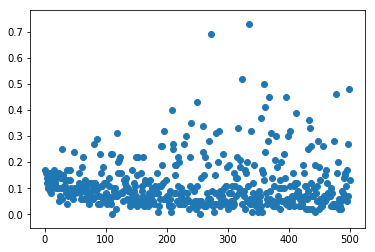

In [5]:
plt.scatter(df_niche.ranking, df_niche["Hispanic"])

In [6]:
#get undergraduate size data
df_niche_pop = pd.read_csv("datasets/undergradpop.csv")
for indexr, university in df_niche_pop.iterrows():
    newvalue = int(university[2])
    df_niche_pop.loc[indexr,"undergradpop"] = newvalue
df_niche_pop

,ranking,name,undergradpop
0,1,massachusetts-institute-of-technology,4510
1,2,stanford-university,7064
2,3,harvard-university,7147
3,4,yale-university,5743
4,5,princeton-university,5260
5,6,university-of-pennsylvania,10496
6,7,columbia-university,7592
7,8,duke-university,6669
8,9,brown-university,6666
9,10,california-institute-of-technology,961


In [7]:
#all racial demographic, undergraduate population info for top 500 universities (4 year public and private)
df_top500 = pd.concat([df_niche, df_niche_pop.undergradpop], axis=1)
df_top500 = df_top500[['ranking','name','undergradpop','African American', 'Asian', 'Hispanic', 'Multiracial', 'Native American','Pacific Islander', 'Unknown', 'White']]
df_top500

,ranking,name,undergradpop,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
0,1,massachusetts-institute-of-technology,4510,0.07,0.28,0.17,0.07,0,0,0.02,0.39
1,2,stanford-university,7064,0.07,0.23,0.16,0.12,0.01,0,0.01,0.4
2,3,harvard-university,7147,0.07,0.22,0.12,0.06,0,0,0.04,0.49
3,4,yale-university,5743,0.07,0.19,0.14,0.06,0.01,0,0.04,0.49
4,5,princeton-university,5260,0.08,0.23,0.1,0.05,0,0,0.07,0.47
5,6,university-of-pennsylvania,10496,0.08,0.23,0.1,0.05,0,0,0.05,0.49
6,7,columbia-university,7592,0.09,0.21,0.16,0.06,0,0,0.04,0.45
7,8,duke-university,6669,0.11,0.23,0.09,0.02,0.01,0,0.03,0.51
8,9,brown-university,6666,0.07,0.16,0.13,0.07,0,0,0.09,0.48
9,10,california-institute-of-technology,961,0.01,0.47,0.13,0.08,0,0,0,0.31


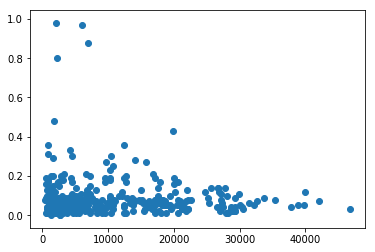

In [8]:
plt.scatter(df_top500.undergradpop, df_top500["African American"])

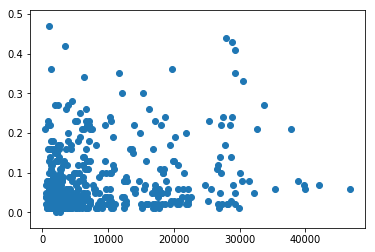

In [9]:
plt.scatter(df_top500.undergradpop, df_top500["Asian"])

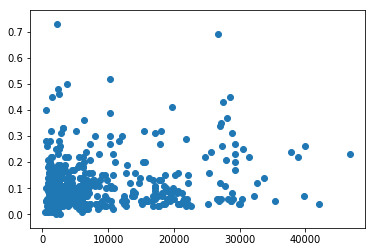

In [10]:
plt.scatter(df_top500.undergradpop, df_top500["Hispanic"])

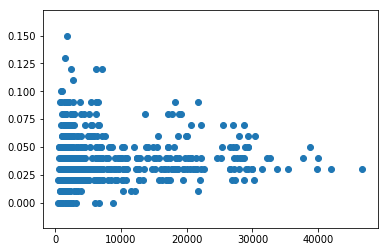

In [11]:
plt.scatter(df_top500.undergradpop, df_top500["Multiracial"])

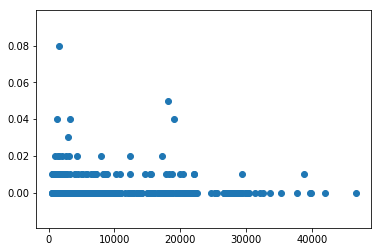

In [12]:
plt.scatter(df_top500.undergradpop, df_top500["Native American"])

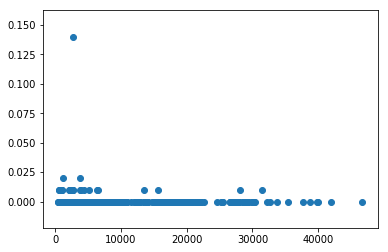

In [13]:
plt.scatter(df_top500.undergradpop, df_top500["Pacific Islander"])

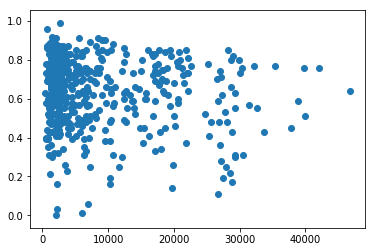

In [14]:
plt.scatter(df_top500.undergradpop, df_top500["White"])

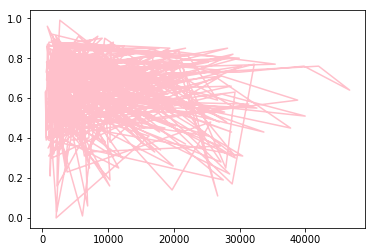

In [15]:
plt.plot(df_top500.undergradpop, df_top500["White"], 'pink')

In [16]:
df_sorted = df_top500.sort_values(by=['undergradpop'])

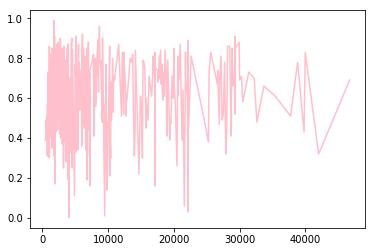

In [17]:
plt.plot(df_sorted.undergradpop, df_top500["White"], 'pink')

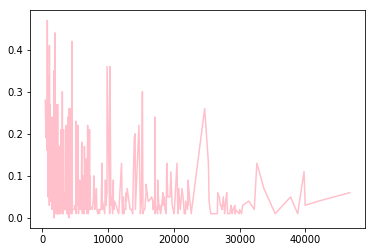

In [18]:
plt.plot(df_sorted.undergradpop, df_top500["Asian"], 'pink')

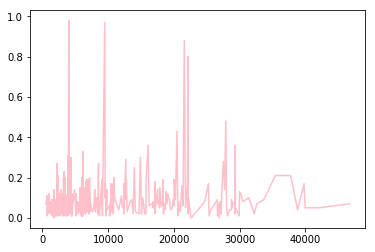

In [19]:
plt.plot(df_sorted.undergradpop, df_top500["African American"], 'pink')

In [20]:
from scipy.stats import uniform, norm, bernoulli, poisson, pearsonr

In [21]:
print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(df_sorted['undergradpop'], df_sorted['Asian'])[0], pearsonr(df_sorted['undergradpop'], df_sorted['Asian'])[1]))

Pearsons correlation coefficient = 0.225 (p=0.000)


In [22]:
print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(df_sorted['undergradpop'], df_sorted['African American'])[0], pearsonr(df_sorted['undergradpop'], df_sorted['African American'])[1]))

Pearsons correlation coefficient = -0.003 (p=0.939)


In [23]:
print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(df_sorted['undergradpop'], df_sorted['Hispanic'])[0], pearsonr(df_sorted['undergradpop'], df_sorted['Hispanic'])[1]))

Pearsons correlation coefficient = 0.172 (p=0.000)


In [24]:
print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(df_sorted['undergradpop'], df_sorted['Native American'])[0], pearsonr(df_sorted['undergradpop'], df_sorted['Native American'])[1]))

Pearsons correlation coefficient = -0.070 (p=0.120)


In [25]:
print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(df_sorted['undergradpop'], df_sorted['Pacific Islander'])[0], pearsonr(df_sorted['undergradpop'], df_sorted['Pacific Islander'])[1]))

Pearsons correlation coefficient = -0.055 (p=0.220)


In [26]:
print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(df_sorted['undergradpop'], df_sorted['White'])[0], pearsonr(df_sorted['undergradpop'], df_sorted['White'])[1]))

Pearsons correlation coefficient = -0.153 (p=0.001)


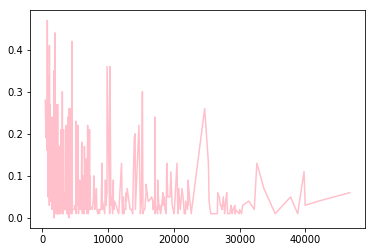

In [27]:
plt.plot(df_sorted.undergradpop, df_top500["Asian"], 'pink')

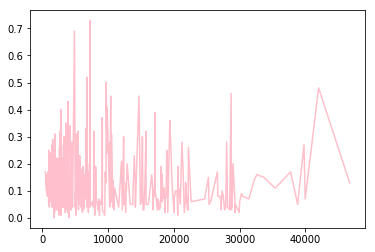

In [28]:
plt.plot(df_sorted.undergradpop, df_top500["Hispanic"], 'pink')

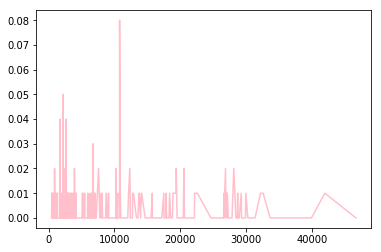

In [29]:
plt.plot(df_sorted.undergradpop, df_top500["Native American"], 'pink')

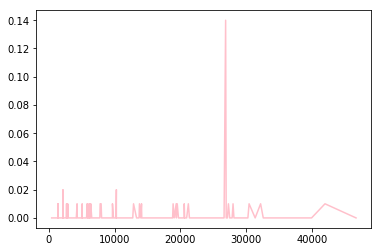

In [30]:
plt.plot(df_sorted.undergradpop, df_top500["Pacific Islander"], 'pink')

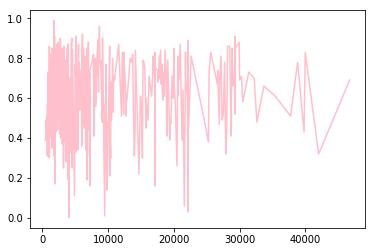

In [31]:
plt.plot(df_sorted.undergradpop, df_top500["White"], 'pink')

In [33]:
df_top500["var"] =  df_top500.loc[:, ["African American", "Asian", "Hispanic","Multiracial","Pacific Islander", "Native American", "Unknown", "White"]].var(axis=1)
df_top500

,ranking,name,undergradpop,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White,var
0,1,massachusetts-institute-of-technology,4510,0.07,0.28,0.17,0.07,0,0,0.02,0.39,0.020657
1,2,stanford-university,7064,0.07,0.23,0.16,0.12,0.01,0,0.01,0.4,0.019000
2,3,harvard-university,7147,0.07,0.22,0.12,0.06,0,0,0.04,0.49,0.026857
3,4,yale-university,5743,0.07,0.19,0.14,0.06,0.01,0,0.04,0.49,0.025857
4,5,princeton-university,5260,0.08,0.23,0.1,0.05,0,0,0.07,0.47,0.024657
5,6,university-of-pennsylvania,10496,0.08,0.23,0.1,0.05,0,0,0.05,0.49,0.027057
6,7,columbia-university,7592,0.09,0.21,0.16,0.06,0,0,0.04,0.45,0.022570
7,8,duke-university,6669,0.11,0.23,0.09,0.02,0.01,0,0.03,0.51,0.029943
8,9,brown-university,6666,0.07,0.16,0.13,0.07,0,0,0.09,0.48,0.023686
9,10,california-institute-of-technology,961,0.01,0.47,0.13,0.08,0,0,0,0.31,0.030771


In [35]:
# Higher variance --> less diverse student body

Higher variance --> less diverse student body

df_top500.size

Here, we are sorting the colleges based upon their undergraduate population/enrollment. We have them split evenly due to the fact that we have a disproportionate amount of larger colleges vs smaller, and so it would provide less accurate results because there is more data being analyzed for some groups than others.
We create three new dataframes so we can analyze the top third, middle third, and bottom third of college populations from the 500 top ranked universities.

In [54]:
df_top500 = df_top500.sort_values(by = 'undergradpop')
df_top500
df_split = np.array_split(df_top500, 3)
df_top = pd.DataFrame(df_split[0])
df_mid = pd.DataFrame(df_split[1])
df_bot = pd.DataFrame(df_split[2])

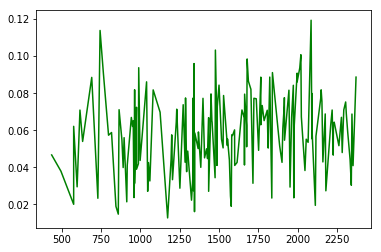

In [55]:
plt.plot(df_top.undergradpop, df_top['var'], 'green')

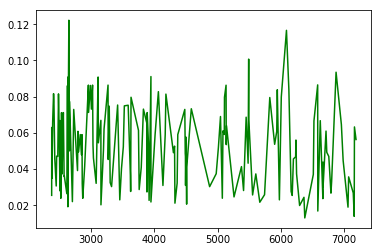

In [56]:
plt.plot(df_mid.undergradpop, df_mid['var'], 'green')

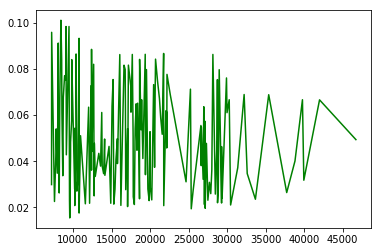

In [57]:
plt.plot(df_bot.undergradpop, df_bot['var'], 'green')

This doesn't look very good! Let's run a linear regression:

In [63]:
outcome, predictors = patsy.dmatrices('undergradpop ~ var', df_top)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           undergradpop   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.989
Date:                Fri, 31 May 2019   Prob (F-statistic):             0.0154
Time:                        13:42:52   Log-Likelihood:                -1268.6
No. Observations:                 167   AIC:                             2541.
Df Residuals:                     165   BIC:                             2547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1296.4573    106.650     12.156      0.0

In [64]:
outcome, predictors = patsy.dmatrices('undergradpop ~ var', df_mid)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           undergradpop   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.230
Date:                Fri, 31 May 2019   Prob (F-statistic):             0.0413
Time:                        13:43:33   Log-Likelihood:                -1460.5
No. Observations:                 167   AIC:                             2925.
Df Residuals:                     165   BIC:                             2931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4847.3029    298.682     16.229      0.0

In [66]:
outcome, predictors = patsy.dmatrices('undergradpop ~ var', df_bot)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           undergradpop   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.170
Date:                Fri, 31 May 2019   Prob (F-statistic):              0.143
Time:                        13:43:46   Log-Likelihood:                -1733.2
No. Observations:                 166   AIC:                             3470.
Df Residuals:                     164   BIC:                             3477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.076e+04   1598.255     12.990      0.0

There is like no correlation between diversity and school size. Coefficient is small (Almost no rise in trend or fall in trend)

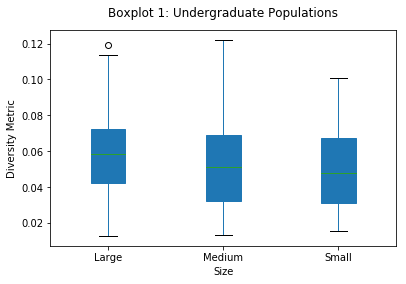

In [83]:
data1 = df_top.assign(Size=1)
data2 = df_mid.assign(Size=2)
data3 = df_bot.assign(Size=3)
cdf = pd.concat([data1,data2,data3])
#mdf = pd.melt(cdf, id_vars=['Size'], var_name=['var'])
boxy = cdf.boxplot(by ='Size', column =['var'], grid = False,patch_artist = True)
plt.xticks([1, 2, 3], ['Large', 'Medium', 'Small'])
plt.suptitle("Boxplot 1: Undergraduate Populations")
plt.title("")
boxy.set_ylabel('Diversity Metric')
colors = ['lightblue', 'lightgreen', 'pink']